
# UMAP on the MNIST Digits dataset

Note that UMAP manages to both group the individual digit
classes, but also to retain the overall global structure
among the different digit classes -- keeping 1 far from
0, and grouping triplets of 3,5,8 and 4,7,9 which can
blend into one another in some cases.


/Users/oscarmoxon/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


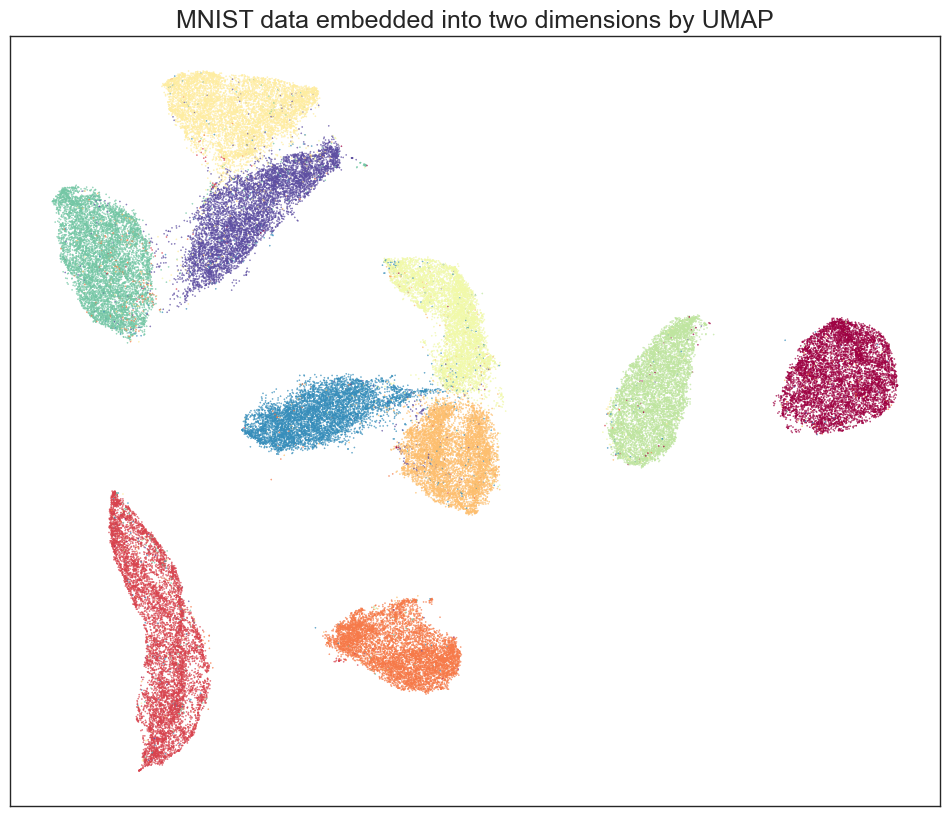

In [7]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

mnist = fetch_openml("mnist_784", version=1)

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(mnist.data)

fig, ax = plt.subplots(figsize=(12, 10))
color = mnist.target.astype(int)
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.savefig("vis/mnist_umap.png")

plt.show()

/Users/oscarmoxon/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


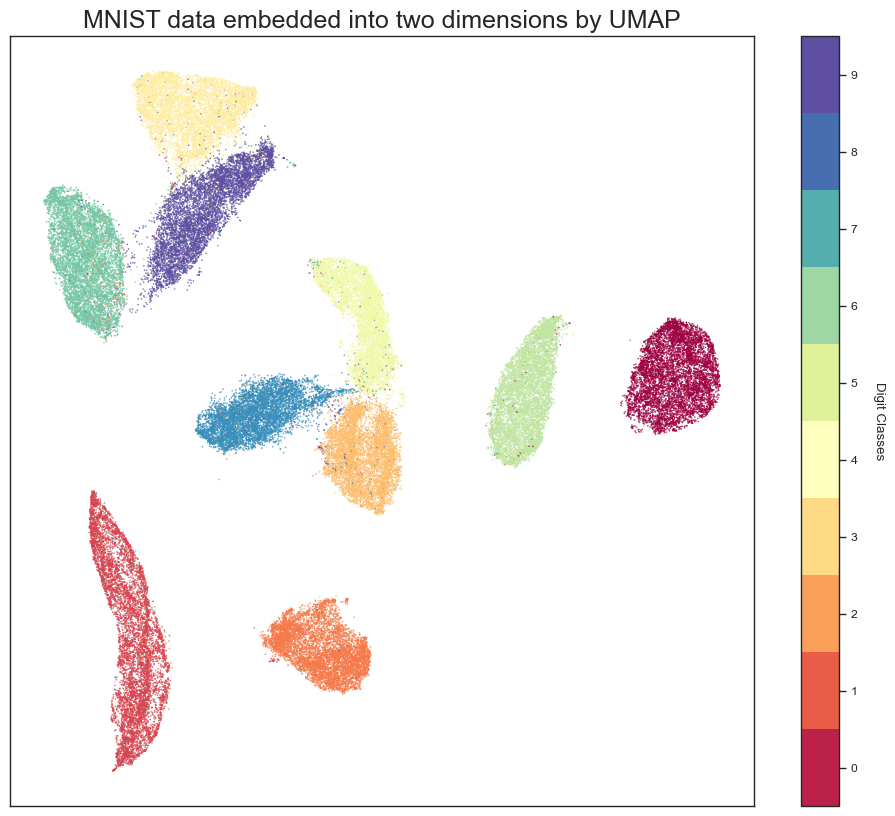

In [13]:
import numpy as np
import matplotlib.colors

# Fetch the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)

# Initialize UMAP
reducer = umap.UMAP(random_state=42)

# Fit and transform the dataset to reduce to 2 dimensions
embedding = reducer.fit_transform(mnist.data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=mnist.target.astype(int), cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

# Create a color map and norm object for discrete values
cmap = plt.cm.Spectral
bounds = np.arange(0, 11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Create color bar with discrete classes
cbar = plt.colorbar(scatter, cmap=cmap, norm=norm, boundaries=bounds, ticks=np.arange(0.5, 10.5), spacing='proportional')
cbar.set_ticklabels(np.arange(10))
cbar.set_label('Digit Classes', rotation=270, labelpad=20)

plt.show()